# Set Up

In [39]:
import pandas as pd

# allow us to see images in markdown
from IPython.display import Image

# for interactive graphs
%pylab inline

# allows use to look at plots
import matplotlib
import matplotlib.pyplot as plt

# set the plot sizes
matplotlib.rcParams['figure.figsize'] = (40.0, 20.0)
# %matplotlib inline

# for better looking print outs
import pprint
pp = pprint.PrettyPrinter(indent=4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = pd.read_csv('Data/transactions.csv')
data = data.drop(['Unnamed: 0', 'Unnamed: 7'], axis=1)
data['Date'] = pd.to_datetime(data['Date'])

In [3]:
data.head()

,payer,receiver,tran_text,Date,dow
0,abacbefabc833a96597289665268d99e58ee1b2e4550dd...,9c044a510cd7333bda6da6a2a364372974a0a8a573ac3f...,:Italy:,2019-01-21,Monday
1,f0bf2b3ec1598e6ab6ef15ea0251328ca3731e237bdb49...,abacbefabc833a96597289665268d99e58ee1b2e4550dd...,Heroics,2019-01-19,Saturday
2,abacbefabc833a96597289665268d99e58ee1b2e4550dd...,523c406e16c2856eefb065c2ace781a81a608b6e826ca4...,To regain Kosovo,2019-01-18,Friday
3,f0bf2b3ec1598e6ab6ef15ea0251328ca3731e237bdb49...,abacbefabc833a96597289665268d99e58ee1b2e4550dd...,Reading at a club,2019-01-18,Friday
4,abacbefabc833a96597289665268d99e58ee1b2e4550dd...,f0bf2b3ec1598e6ab6ef15ea0251328ca3731e237bdb49...,For the Culture,2019-01-17,Thursday


The question is, how many different people are involved in this dataset?

In [4]:
num_payers = data['payer'].unique().shape
print("Number of Payers: ", num_payers[0])
num_receivers = data['receiver'].unique().shape
print("Number of Receivers: ", num_receivers[0])

Number of Payers:  245877
Number of Receivers:  243751


So as we can see, there's a lot people involved. 
There's simply no way to graph something this large.
So what we want to do is only consider the transactions for the most active users.

However, we can do that later

for now, we can just try to build a graph for the first few hundred instances.

In [5]:
# sort row values by payer
data_sorted_by_payer = data.sort_values(by=['payer'])
data_sorted_by_payer.head()

,payer,receiver,tran_text,Date,dow
1909622,00001df0269a8d4736f12170f383e519217e1d01f52164...,166259669b52ce0b4cc0f0129183d33d1efc5b75dfb449...,E and g,2016-02-09,Tuesday
1043044,00001df0269a8d4736f12170f383e519217e1d01f52164...,924106531b458b42c82ce157d777eab0d13ba6f4f7d243...,H,2017-09-10,Sunday
1043265,00001df0269a8d4736f12170f383e519217e1d01f52164...,924106531b458b42c82ce157d777eab0d13ba6f4f7d243...,Mozz sticks,2015-07-11,Saturday
1909634,00001df0269a8d4736f12170f383e519217e1d01f52164...,166259669b52ce0b4cc0f0129183d33d1efc5b75dfb449...,Jubjaeng,2015-11-01,Sunday
1909631,00001df0269a8d4736f12170f383e519217e1d01f52164...,166259669b52ce0b4cc0f0129183d33d1efc5b75dfb449...,Jared and spencer electric.,2015-11-28,Saturday


In [6]:
# get only the first 1000 because 
data_sorted_by_payer_top = data_sorted_by_payer[:1000]

In [7]:
type(data_sorted_by_payer_top)

pandas.core.frame.DataFrame

In [8]:
data_sorted_by_payer_top.head()

,payer,receiver,tran_text,Date,dow
1909622,00001df0269a8d4736f12170f383e519217e1d01f52164...,166259669b52ce0b4cc0f0129183d33d1efc5b75dfb449...,E and g,2016-02-09,Tuesday
1043044,00001df0269a8d4736f12170f383e519217e1d01f52164...,924106531b458b42c82ce157d777eab0d13ba6f4f7d243...,H,2017-09-10,Sunday
1043265,00001df0269a8d4736f12170f383e519217e1d01f52164...,924106531b458b42c82ce157d777eab0d13ba6f4f7d243...,Mozz sticks,2015-07-11,Saturday
1909634,00001df0269a8d4736f12170f383e519217e1d01f52164...,166259669b52ce0b4cc0f0129183d33d1efc5b75dfb449...,Jubjaeng,2015-11-01,Sunday
1909631,00001df0269a8d4736f12170f383e519217e1d01f52164...,166259669b52ce0b4cc0f0129183d33d1efc5b75dfb449...,Jared and spencer electric.,2015-11-28,Saturday


# Basics Of Graphs

So what is a graph?
    A graph is simply a mathematical structure used to study the relationships between objects.
    It is essentially a bunch of nodes (also called vertices) connected by edges.
    
As you can see below, the entire image is the graph, each circle is a node, and each line connecting the nodes are the edges.

![Example of Graph](images/example-graph.png)

Just some more terminologies on graphs:


   * graphs: math structures for studying relationships between objects
   * a graph is a pair of sets. G = (V, E), V is the set of vertices, E is the set of edges (connections from one vertices to another, and are unordered)
     * V = {v1, v2, v3, v4, v5} 
     * E = {(v1,v2), (v2,v5), (v5, v5), (v4,v5), (v4,v4)}
   * digraph: D = (V,A), where A is ordered (set of arcs).  Ordered meaning (u,v) is not the same as (v,u).
   * vertices u and v are the end vertices of the edge (u,v).
   * two edges with the same end vertices are parallel
   * (v,v) is a loop.
   * a graph is simple if it has no parallels and no loops 
   * a graph is empty if it has no edges.
   * a graph is a null graph it there are no vertices
   * a graph with one vertices is a trivial graph
   * edges are adjacent if they have a common vertex. 
   * vertices are adjacent if they have a common edge.
   * degree of vertex v: d(v): number of edges with v as an end vertex
   * a graph is complete if its edge set contains every possible edge between all of the vertices
   * a walk in a graph G = (V, E) is a finite alternating sequence of form ViEiViEi consisting of vertices and edges of the graph G
   * a walk is open if initial and final vertices are different
   * a walk is closed if initial and final v are the same.
   * a walk is a trial if any edge is traversed at most once 
   * a trail is a path if any vertex is traversed at most once
   * a closed path is a circuit.
   
For more information, check [here](https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/)

To build a graph, we will be using a python library called networkx

To install, type in:

`pip install networkx[all]`

If that does not work, try:

`pip install networkx`

In [9]:
import networkx as nx

## Creating A Graph

In [10]:
def create_basic_graph(df):
    """
    Create a basic graph using the payer and receiver
    Initialize the edge's weights, transactions, and dates.
    
    :param df: dataframe
    :type  df: pandas.core.frame.DataFrame
    :returns: an initialized graph
    :rtype:   networkx.classes.digraph.DiGraph
    """

    # initialize the graph
    # note that we are creating a digraph
    # https://networkx.github.io/documentation/stable/reference/classes/digraph.html#networkx.DiGraph
    graph = nx.DiGraph()
    
    # iterate through each row of the dataframe
    for index, row in df.iterrows():
        connection = (row['payer'], row['receiver'])
        c0 = connection[0]
        c1 = connection[1]
        
        """
            if there already exists a connection:
                increase its weight by 1
                    (weight determines how strong the connection is)
                add a transaction to the list
                add the date to the list
                add the day of week to the list
        """
        if graph.has_edge(*connection):
            graph[c0][c1]['weight'] = graph[c0][c1]['weight'] + 1
            graph[c0][c1]['transaction'] = graph[c0][c1]['transaction'] + [row['tran_text']]
            graph[c0][c1]['date'] = graph[c0][c1]['date'] + [row['Date']]
            graph[c0][c1]['dow'] = graph[c0][c1]['dow'] + [row['dow']]

        # if connection does not exist, create a connection
        else:
            graph.add_edge(
                *connection, 
                transaction=[row['tran_text']], # set its transaction
                weight=1, 
                date=[row['Date']],
                dow=[row['dow']]
            )
    return graph

In [11]:
graph = create_basic_graph(data_sorted_by_payer_top)

## Drawing The Graph

See [here](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) for different layouts for displaying the graph.

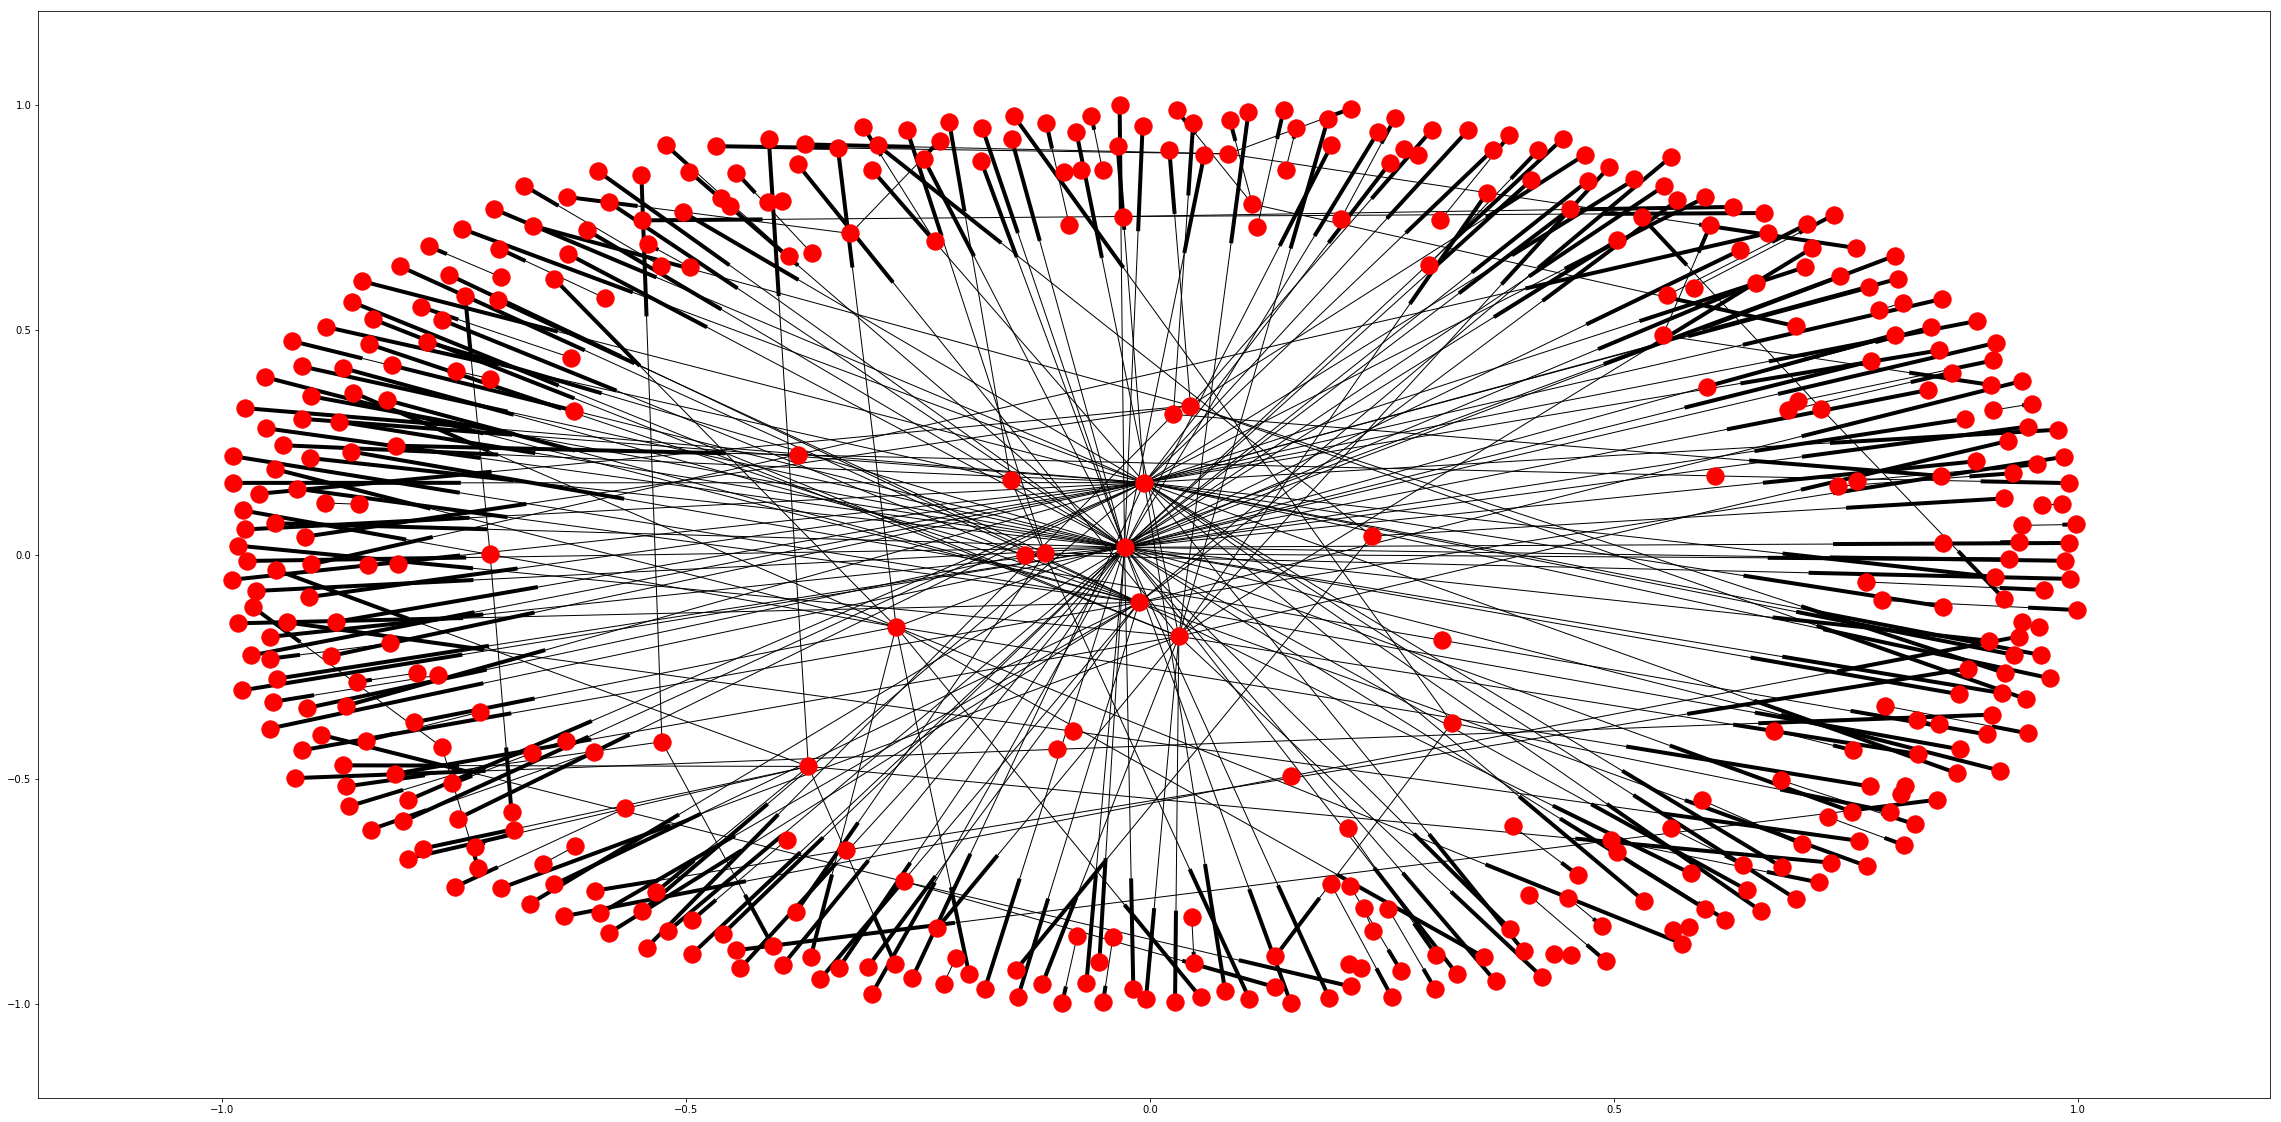

In [40]:
# Spring layout is a way to make the graph look better
# nx.spring_layout(graph)
nx.circular_layout(graph)
# draw the graph
nx.draw_networkx(graph,with_labels=False)
# use matplotlib to visualize the graph on jupyter notebook
# plt.show()

## Finding Relevant Information About The Graph

In [17]:
# get all the relevant information of the graph built
print(nx.info(graph))

Name: 
Type: DiGraph
Number of nodes: 426
Number of edges: 322
Average in degree:   0.7559
Average out degree:   0.7559


In [23]:
# find all the node names
# we're just going to output the first 5
list (graph.nodes)[:5]

['00001df0269a8d4736f12170f383e519217e1d01f5216420cd2c2300a2ebc84b',
 '166259669b52ce0b4cc0f0129183d33d1efc5b75dfb4495e787ce5c2e727de6c',
 '924106531b458b42c82ce157d777eab0d13ba6f4f7d2437bb9296819d389d58f',
 '289954cd250cec2ac0b08f82fbc120433e458a783b8737362226a07518ffe433',
 '00002104d47891a6ae3d38812e2c061a71c891a79c9c63df1d66a7fc18945034']

In [22]:
# find all the edges
list (graph.edges)[:5]

[('00001df0269a8d4736f12170f383e519217e1d01f5216420cd2c2300a2ebc84b',
  '166259669b52ce0b4cc0f0129183d33d1efc5b75dfb4495e787ce5c2e727de6c'),
 ('00001df0269a8d4736f12170f383e519217e1d01f5216420cd2c2300a2ebc84b',
  '924106531b458b42c82ce157d777eab0d13ba6f4f7d2437bb9296819d389d58f'),
 ('00001df0269a8d4736f12170f383e519217e1d01f5216420cd2c2300a2ebc84b',
  '289954cd250cec2ac0b08f82fbc120433e458a783b8737362226a07518ffe433'),
 ('00002104d47891a6ae3d38812e2c061a71c891a79c9c63df1d66a7fc18945034',
  'de96549ae010281f58d4bd563d0928a6a181941cd181fe74a2d0a1571334ae94'),
 ('00002104d47891a6ae3d38812e2c061a71c891a79c9c63df1d66a7fc18945034',
  '2783fdeddb6310bed485c10c4e4a8d7d15a544fb532356c4c688d5d7615947b2')]

Find the density of the graph

density is 0 for a graph without edges

density is 1 for a complete graph

The lower the density, the less "connected" the graph is

See [here](https://networkx.github.io/documentation/stable/reference/generated/networkx.classes.function.density.html#networkx-classes-function-density) for documentation:

In [44]:
nx.classes.function.density(graph)

0.0017785142225904447

In [49]:
# find the frequencies of each degree
# take the set to see all the unique degrees
set (nx.classes.function.degree_histogram(graph))

{0, 1, 2, 10, 12, 395}

## Looking At A Sample Payer

In [27]:
# lets look at a sample of one payer

# row number of a random payer
payer_row_num = 1909622

# id of the payer
sample_payer = data_sorted_by_payer_top['payer'][payer_row_num]
sample_payer

'00001df0269a8d4736f12170f383e519217e1d01f5216420cd2c2300a2ebc84b'

Here we find all the information regarding connections to that player.

For example, this payer is connected to receiver:
'166259669b52ce0b4cc0f0129183d33d1efc5b75dfb4495e787ce5c2e727de6c'

There are 5 transactions: 
['E and g', 'Jubjaeng', 'Jared and spencer electric.', ':fuel_pump:', 'Uber']

Etc.

In [29]:
graph[sample_payer]

AtlasView({'166259669b52ce0b4cc0f0129183d33d1efc5b75dfb4495e787ce5c2e727de6c': {'transaction': ['E and g', 'Jubjaeng', 'Jared and spencer electric.', ':fuel_pump:', 'Uber'], 'weight': 5, 'date': [Timestamp('2016-02-09 00:00:00'), Timestamp('2015-11-01 00:00:00'), Timestamp('2015-11-28 00:00:00'), Timestamp('2015-12-10 00:00:00'), Timestamp('2016-02-15 00:00:00')], 'dow': ['Tuesday', 'Sunday', 'Saturday', 'Thursday', 'Monday']}, '924106531b458b42c82ce157d777eab0d13ba6f4f7d2437bb9296819d389d58f': {'transaction': ['H', 'Mozz sticks', 'for probationary jumpsuits', 'C', 'U'], 'weight': 5, 'date': [Timestamp('2017-09-10 00:00:00'), Timestamp('2015-07-11 00:00:00'), Timestamp('2017-11-20 00:00:00'), Timestamp('2017-11-30 00:00:00'), Timestamp('2017-12-08 00:00:00')], 'dow': ['Sunday', 'Saturday', 'Monday', 'Thursday', 'Friday']}, '289954cd250cec2ac0b08f82fbc120433e458a783b8737362226a07518ffe433': {'transaction': ['Thanks'], 'weight': 1, 'date': [Timestamp('2017-06-17 00:00:00')], 'dow': ['Sat

In [32]:
# if we want to see only the connection names
list (graph.neighbors(sample_payer))

['166259669b52ce0b4cc0f0129183d33d1efc5b75dfb4495e787ce5c2e727de6c',
 '924106531b458b42c82ce157d777eab0d13ba6f4f7d2437bb9296819d389d58f',
 '289954cd250cec2ac0b08f82fbc120433e458a783b8737362226a07518ffe433']

In [33]:
# the number of connections that sample payer has 
graph.degree(sample_payer)

3

For some more resources to look at:

[Data Camp Social Media Analysis](https://www.datacamp.com/community/tutorials/social-network-analysis-python)

Since networkx isn't really geared to visualization, but more for analysis, we can use software such as [Gelphi](https://gephi.org/) for better visualization. More on this later.